In [51]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [52]:
#Reading a csv file using pandas
car_resale = pd.read_csv('car_resale.csv')
car_df = pd.DataFrame(car_resale)
#Printing the first five rows form Data Frame
print(car_df.head())


   Unnamed: 0                     full_name resale_price registered_year  \
0           0  2017 Maruti Baleno 1.2 Alpha  ₹ 5.45 Lakh            2017   
1           1            2018 Tata Hexa XTA    ₹ 10 Lakh            2018   
2           2   2015 Maruti Swift Dzire VXI  ₹ 4.50 Lakh            2015   
3           3   2015 Maruti Swift Dzire VXI  ₹ 4.50 Lakh            2015   
4           4    2009 Hyundai i10 Magna 1.1  ₹ 1.60 Lakh            2009   

  engine_capacity              insurance transmission_type  kms_driven  \
0         1197 cc  Third Party insurance            Manual  40,000 Kms   
1         2179 cc  Third Party insurance         Automatic  70,000 Kms   
2         1197 cc  Third Party insurance            Manual  70,000 Kms   
3         1197 cc  Third Party insurance            Manual  70,000 Kms   
4         1086 cc  Third Party insurance            Manual  80,000 Kms   

     owner_type fuel_type  max_power  seats     mileage  body_type  city  
0   First Owner    Petr

In [53]:
#Printing the datatypes of DataFrame 
print(car_df.dtypes)

Unnamed: 0             int64
full_name             object
resale_price          object
registered_year       object
engine_capacity       object
insurance             object
transmission_type     object
kms_driven            object
owner_type            object
fuel_type             object
max_power             object
seats                float64
mileage               object
body_type             object
city                  object
dtype: object


In [54]:
#Creating a function that can convert the price to nepalese rupees and making data types of float
def convertPrice(value):
    if isinstance(value, float):
        return value
    if 'Lakh' in value:
        return float(value.replace('₹', '').replace(',','').replace(' Lakh', '')) * 100000 
    elif 'Crore' in value:
        return float(value.replace('₹', '').replace(',','').replace(' Crore', '')) * 10000000 
    else:
        return float(value.replace('₹', '').replace(',',''))

car_df["resale_price"] = car_df["resale_price"].apply(convertPrice)
car_df["resale_price"] = car_df["resale_price"] * 1.6
print(car_df["resale_price"].head(20))

0      872000.0
1     1600000.0
2      720000.0
3      720000.0
4      256000.0
5      752000.0
6      576000.0
7      320000.0
8      592000.0
9      192000.0
10     528000.0
11     760000.0
12    1097600.0
13    2000000.0
14    1760000.0
15     632000.0
16     560000.0
17     462400.0
18     451200.0
19    1600000.0
Name: resale_price, dtype: float64


In [55]:
"""Removing cc from engine capacity and turning the object type to integer value"""
car_df['engine_capacity'] = car_df['engine_capacity'].str.replace('cc','')
# car_df["engine_capacity"] = car_df["engine_capacity"].astype('int')
# print(car_df['engine_capacity'].head())
print(car_df['engine_capacity'].dtype)
print(car_df.head())

object
   Unnamed: 0                     full_name  resale_price registered_year  \
0           0  2017 Maruti Baleno 1.2 Alpha      872000.0            2017   
1           1            2018 Tata Hexa XTA     1600000.0            2018   
2           2   2015 Maruti Swift Dzire VXI      720000.0            2015   
3           3   2015 Maruti Swift Dzire VXI      720000.0            2015   
4           4    2009 Hyundai i10 Magna 1.1      256000.0            2009   

  engine_capacity              insurance transmission_type  kms_driven  \
0           1197   Third Party insurance            Manual  40,000 Kms   
1           2179   Third Party insurance         Automatic  70,000 Kms   
2           1197   Third Party insurance            Manual  70,000 Kms   
3           1197   Third Party insurance            Manual  70,000 Kms   
4           1086   Third Party insurance            Manual  80,000 Kms   

     owner_type fuel_type  max_power  seats     mileage  body_type  city  
0   First 

36000000.0
44800.0


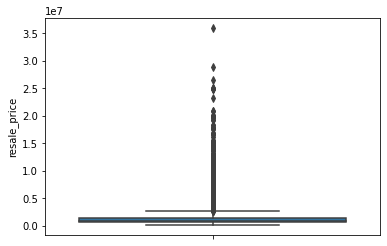

In [56]:
print(car_df["resale_price"].max())
print(car_df["resale_price"].min())
sns.boxplot(data=car_df,y="resale_price")
plt.show()

In [57]:
car_df["full_name"] = car_df["full_name"].astype(str)
print(car_df["full_name"].dtypes)

object


In [58]:
# Addressing missing values in dataframe
"""Checking missing values """
print(car_df.isna().sum())
# Dropping missing values
"""5% less of total values"""
thresold = len(car_df)*0.05
print(thresold)

Unnamed: 0             0
full_name              0
resale_price           0
registered_year       69
engine_capacity       14
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power            102
seats                 10
mileage              508
body_type              0
city                   0
dtype: int64
872.3000000000001


In [59]:
cols_with_missing_values = car_df.columns[car_df.isna().sum()>0]
print(cols_with_missing_values)

Index(['registered_year', 'engine_capacity', 'insurance', 'kms_driven',
       'owner_type', 'max_power', 'seats', 'mileage'],
      dtype='object')


In [60]:
car_df.value_counts("registered_year").head(20).dtypes

dtype('int64')

In [61]:
"""Dropping duplicates using drop_duplicates() function"""
columns_name = ['full_name','resale_price','registered_year', 'engine_capacity', 'transmission_type','fuel_type','insurance', 'kms_driven',
                 'owner_type', 'max_power', 'seats', 'mileage']
car_df.drop_duplicates(subset=columns_name,keep=False,inplace=True)
print(car_df)

       Unnamed: 0                               full_name  resale_price  \
0               0            2017 Maruti Baleno 1.2 Alpha      872000.0   
1               1                      2018 Tata Hexa XTA     1600000.0   
4               4              2009 Hyundai i10 Magna 1.1      256000.0   
5               5             2015 Hyundai i20 Active 1.2      752000.0   
6               6        2017 Tata Tiago 1.05 Revotorq XZ      576000.0   
...           ...                                     ...           ...   
17441       17441             2013 Honda Amaze VX i-Vtech      520000.0   
17442       17442            2016 Toyota Camry 2.5 Hybrid     3320000.0   
17443       17443         2016 Toyota Corolla Altis GL MT     1336000.0   
17444       17444  2019 Hyundai Creta 1.6 CRDi AT SX Plus     2232000.0   
17445       17445             2017 Maruti Swift Dzire VDi     1040000.0   

      registered_year engine_capacity              insurance  \
0                2017           119

In [62]:
car_df.shape


(17026, 15)

In [63]:
register_year_df = car_df[car_df["registered_year"].str.contains("Jun|Jul|Mar|May|Jan|Feb|Apr|Aug|Sep|Nov|Oct|Dec",na=False)]
print(register_year_df)

       Unnamed: 0                                        full_name  \
205           205                    2021 Audi e-tron 55 Sportback   
206           206                 2018 Audi Q3 30 TFSI Premium FWD   
207           207  2018 BMW 6 Series GT 630i Luxury Line 2018-2021   
208           208                      2015 Audi A6 35 TFSI Matrix   
209           209                 2017 Audi A4 35 TDI Premium Plus   
...           ...                                              ...   
17441       17441                      2013 Honda Amaze VX i-Vtech   
17442       17442                     2016 Toyota Camry 2.5 Hybrid   
17443       17443                  2016 Toyota Corolla Altis GL MT   
17444       17444           2019 Hyundai Creta 1.6 CRDi AT SX Plus   
17445       17445                      2017 Maruti Swift Dzire VDi   

       resale_price registered_year engine_capacity              insurance  \
205      15488000.0          Jul-21              0   Third Party insurance   
206

In [64]:
#registered year custom function to convert date into year only
from datetime import datetime
def convert_to_full_year(date_str):
    try:
        # Attempt to parse as full year
        return datetime.strptime(date_str, "%Y").strftime("%Y")
    except ValueError:
        try:
            # Attempt to parse as month-year
            return datetime.strptime(date_str, "%b-%y").strftime("%Y")
        except ValueError:
            # If parsing fails, return the original string
            return date_str
car_df["registered_year"] = car_df["registered_year"].apply(lambda x : convert_to_full_year(x) if pd.notna(x) else x)
# print(car_df["registered_year"])
print(car_df.tail())

       Unnamed: 0                               full_name  resale_price  \
17441       17441             2013 Honda Amaze VX i-Vtech      520000.0   
17442       17442            2016 Toyota Camry 2.5 Hybrid     3320000.0   
17443       17443         2016 Toyota Corolla Altis GL MT     1336000.0   
17444       17444  2019 Hyundai Creta 1.6 CRDi AT SX Plus     2232000.0   
17445       17445             2017 Maruti Swift Dzire VDi     1040000.0   

      registered_year engine_capacity      insurance transmission_type  \
17441            2013           1198   Comprehensive            Manual   
17442            2016           2494   Comprehensive         Automatic   
17443            2016           1798   Comprehensive            Manual   
17444            2019           1582   Comprehensive         Automatic   
17445            2017           1248   Comprehensive            Manual   

       kms_driven    owner_type fuel_type  max_power  seats     mileage  \
17441  89,000 Kms  Second Own

In [65]:
#Dropping the column name Unnamed
car_df.drop(columns=["Unnamed: 0"],inplace=True)
print(car_df.isna().sum())

full_name              0
resale_price           0
registered_year       67
engine_capacity       12
insurance              7
transmission_type      0
kms_driven             3
owner_type            45
fuel_type              0
max_power             96
seats                 10
mileage              495
body_type              0
city                   0
dtype: int64


In [66]:
print(car_df.dtypes)

full_name             object
resale_price         float64
registered_year       object
engine_capacity       object
insurance             object
transmission_type     object
kms_driven            object
owner_type            object
fuel_type             object
max_power             object
seats                float64
mileage               object
body_type             object
city                  object
dtype: object


In [67]:
#changing the necessary features to category
car_df['transmission_type'] = car_df["transmission_type"].astype("category")
car_df["owner_type"] = car_df["owner_type"].astype("category")
car_df["fuel_type"] = car_df["fuel_type"].astype("category")
print(car_df.dtypes)

full_name              object
resale_price          float64
registered_year        object
engine_capacity        object
insurance              object
transmission_type    category
kms_driven             object
owner_type           category
fuel_type            category
max_power              object
seats                 float64
mileage                object
body_type              object
city                   object
dtype: object


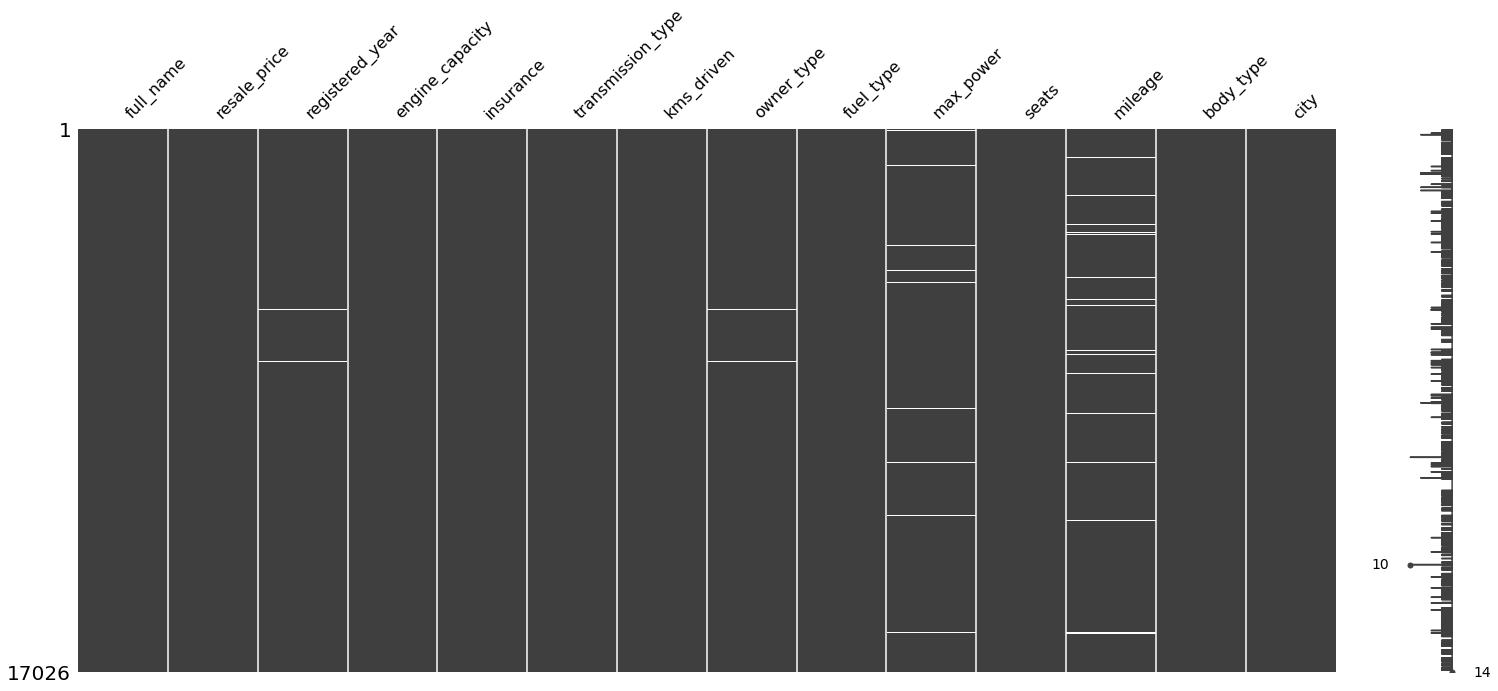

In [68]:
#Imupation for missing values or dropping
import missingno as msno

msno.matrix(car_df)
plt.show()


In [69]:
print(car_df.info())
print(car_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17026 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   full_name          17026 non-null  object  
 1   resale_price       17026 non-null  float64 
 2   registered_year    16959 non-null  object  
 3   engine_capacity    17014 non-null  object  
 4   insurance          17019 non-null  object  
 5   transmission_type  17026 non-null  category
 6   kms_driven         17023 non-null  object  
 7   owner_type         16981 non-null  category
 8   fuel_type          17026 non-null  category
 9   max_power          16930 non-null  object  
 10  seats              17016 non-null  float64 
 11  mileage            16531 non-null  object  
 12  body_type          17026 non-null  object  
 13  city               17026 non-null  object  
dtypes: category(3), float64(2), object(9)
memory usage: 1.6+ MB
None
full_name              0
resale_price

In [70]:
print(car_df.head())
print(car_df.shape)

                          full_name  resale_price registered_year  \
0      2017 Maruti Baleno 1.2 Alpha      872000.0            2017   
1                2018 Tata Hexa XTA     1600000.0            2018   
4        2009 Hyundai i10 Magna 1.1      256000.0            2009   
5       2015 Hyundai i20 Active 1.2      752000.0            2015   
6  2017 Tata Tiago 1.05 Revotorq XZ      576000.0            2017   

  engine_capacity              insurance transmission_type    kms_driven  \
0           1197   Third Party insurance            Manual    40,000 Kms   
1           2179   Third Party insurance         Automatic    70,000 Kms   
4           1086   Third Party insurance            Manual    80,000 Kms   
5           1197   Third Party insurance            Manual    70,000 Kms   
6           1047   Third Party insurance            Manual  1,20,000 Kms   

    owner_type fuel_type  max_power  seats     mileage  body_type  city  
0  First Owner    Petrol    83.1bhp    5.0   21.4 kmpl

In [71]:
car_df['mileage'] = car_df['mileage'].astype(str)
car_df['max_power'] = car_df['max_power'].astype(str)
car_df['mileage'] = pd.to_numeric(car_df['mileage'].str.extract('(\d+\.\d+)')[0], errors='coerce')
car_df['max_power'] = pd.to_numeric(car_df['max_power'].str.extract('(\d+\.\d+)')[0], errors='coerce')

In [72]:
print(car_df)

                                    full_name  resale_price registered_year  \
0                2017 Maruti Baleno 1.2 Alpha      872000.0            2017   
1                          2018 Tata Hexa XTA     1600000.0            2018   
4                  2009 Hyundai i10 Magna 1.1      256000.0            2009   
5                 2015 Hyundai i20 Active 1.2      752000.0            2015   
6            2017 Tata Tiago 1.05 Revotorq XZ      576000.0            2017   
...                                       ...           ...             ...   
17441             2013 Honda Amaze VX i-Vtech      520000.0            2013   
17442            2016 Toyota Camry 2.5 Hybrid     3320000.0            2016   
17443         2016 Toyota Corolla Altis GL MT     1336000.0            2016   
17444  2019 Hyundai Creta 1.6 CRDi AT SX Plus     2232000.0            2019   
17445             2017 Maruti Swift Dzire VDi     1040000.0            2017   

      engine_capacity              insurance transm

In [73]:
#Removing kms from the kms_driven
# car_df['kms_driven']= car_df['kms_driven'].astype(str)
car_df['kms_driven'] = car_df['kms_driven'].str.replace(' Kms',' ').str.replace(',','').astype(float)
print(car_df)

                                    full_name  resale_price registered_year  \
0                2017 Maruti Baleno 1.2 Alpha      872000.0            2017   
1                          2018 Tata Hexa XTA     1600000.0            2018   
4                  2009 Hyundai i10 Magna 1.1      256000.0            2009   
5                 2015 Hyundai i20 Active 1.2      752000.0            2015   
6            2017 Tata Tiago 1.05 Revotorq XZ      576000.0            2017   
...                                       ...           ...             ...   
17441             2013 Honda Amaze VX i-Vtech      520000.0            2013   
17442            2016 Toyota Camry 2.5 Hybrid     3320000.0            2016   
17443         2016 Toyota Corolla Altis GL MT     1336000.0            2016   
17444  2019 Hyundai Creta 1.6 CRDi AT SX Plus     2232000.0            2019   
17445             2017 Maruti Swift Dzire VDi     1040000.0            2017   

      engine_capacity              insurance transm

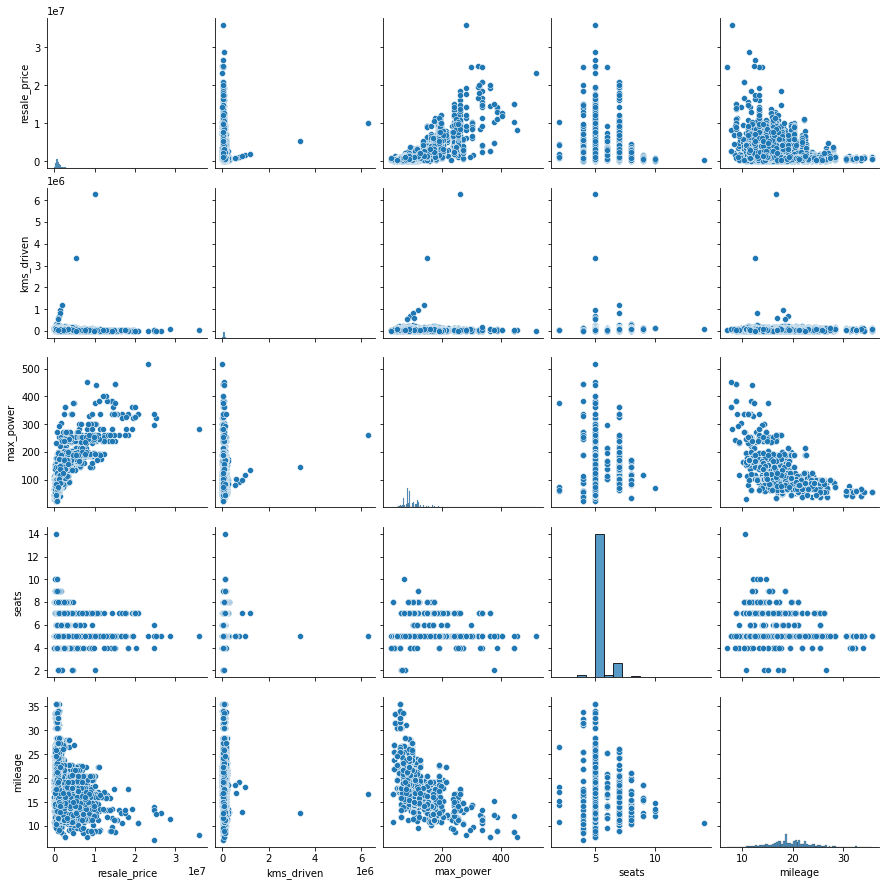

In [74]:
numeric_columns = car_df.select_dtypes(include=['float64', 'int64'])
sns.pairplot(numeric_columns)
plt.show()

In [75]:
print(car_df.duplicated())


0        False
1        False
4        False
5        False
6        False
         ...  
17441    False
17442    False
17443    False
17444    False
17445    False
Length: 17026, dtype: bool


In [76]:
#Copying the car_df to df_processed
df_processed = car_df.copy()
print(df_processed.head())

                          full_name  resale_price registered_year  \
0      2017 Maruti Baleno 1.2 Alpha      872000.0            2017   
1                2018 Tata Hexa XTA     1600000.0            2018   
4        2009 Hyundai i10 Magna 1.1      256000.0            2009   
5       2015 Hyundai i20 Active 1.2      752000.0            2015   
6  2017 Tata Tiago 1.05 Revotorq XZ      576000.0            2017   

  engine_capacity              insurance transmission_type  kms_driven  \
0           1197   Third Party insurance            Manual     40000.0   
1           2179   Third Party insurance         Automatic     70000.0   
4           1086   Third Party insurance            Manual     80000.0   
5           1197   Third Party insurance            Manual     70000.0   
6           1047   Third Party insurance            Manual    120000.0   

    owner_type fuel_type  max_power  seats  mileage  body_type  city  
0  First Owner    Petrol      83.10    5.0    21.40  Hatchback  Agra 

In [77]:
df_processed.reset_index(drop=True, inplace=True)
print(df_processed)

                                    full_name  resale_price registered_year  \
0                2017 Maruti Baleno 1.2 Alpha      872000.0            2017   
1                          2018 Tata Hexa XTA     1600000.0            2018   
2                  2009 Hyundai i10 Magna 1.1      256000.0            2009   
3                 2015 Hyundai i20 Active 1.2      752000.0            2015   
4            2017 Tata Tiago 1.05 Revotorq XZ      576000.0            2017   
...                                       ...           ...             ...   
17021             2013 Honda Amaze VX i-Vtech      520000.0            2013   
17022            2016 Toyota Camry 2.5 Hybrid     3320000.0            2016   
17023         2016 Toyota Corolla Altis GL MT     1336000.0            2016   
17024  2019 Hyundai Creta 1.6 CRDi AT SX Plus     2232000.0            2019   
17025             2017 Maruti Swift Dzire VDi     1040000.0            2017   

      engine_capacity              insurance transm

In [78]:
df_processed.to_csv('processed_car_data.csv', index=False)

In [79]:
#now handling the missing values individually
df_processed.info()
df_processed.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17026 entries, 0 to 17025
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   full_name          17026 non-null  object  
 1   resale_price       17026 non-null  float64 
 2   registered_year    16959 non-null  object  
 3   engine_capacity    17014 non-null  object  
 4   insurance          17019 non-null  object  
 5   transmission_type  17026 non-null  category
 6   kms_driven         17023 non-null  float64 
 7   owner_type         16981 non-null  category
 8   fuel_type          17026 non-null  category
 9   max_power          13144 non-null  float64 
 10  seats              17016 non-null  float64 
 11  mileage            14542 non-null  float64 
 12  body_type          17026 non-null  object  
 13  city               17026 non-null  object  
dtypes: category(3), float64(5), object(6)
memory usage: 1.5+ MB


full_name               0
resale_price            0
registered_year        67
engine_capacity        12
insurance               7
transmission_type       0
kms_driven              3
owner_type             45
fuel_type               0
max_power            3882
seats                  10
mileage              2484
body_type               0
city                    0
dtype: int64

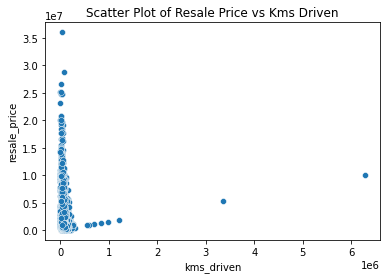

In [80]:
sns.scatterplot(y='resale_price', x='kms_driven', data=df_processed)
plt.title('Scatter Plot of Resale Price vs Kms Driven')
plt.show()

In [81]:
df_processed.value_counts("full_name")

full_name
2016 Hyundai Grand i10 Sportz                   51
2017 Maruti Baleno 1.2 Delta                    41
2015 Maruti Swift VXI                           38
2015 Hyundai Grand i10 Sportz                   35
2016 Maruti Baleno 1.2 Delta                    35
                                                ..
2017 Tata Hexa XMA                               1
2011 Volkswagen Passat Diesel Comfortline AT     1
2011 Volkswagen Jetta 2.0L TDI Highline AT       1
2017 Tata Indica V2 LS                           1
1985 Maruti 800 DX                               1
Length: 6864, dtype: int64

In [82]:
df_processed.dtypes
df_processed['registered_year'] = pd.to_datetime(df_processed['registered_year'],format='%Y')
df_processed['registered_year'].dtype

dtype('<M8[ns]')

In [83]:
current_year = pd.Timestamp.now().year
df_processed['car_age']=current_year-df_processed['registered_year'].dt.year
print(df_processed[['registered_year','car_age']])

      registered_year  car_age
0          2017-01-01      6.0
1          2018-01-01      5.0
2          2009-01-01     14.0
3          2015-01-01      8.0
4          2017-01-01      6.0
...               ...      ...
17021      2013-01-01     10.0
17022      2016-01-01      7.0
17023      2016-01-01      7.0
17024      2019-01-01      4.0
17025      2017-01-01      6.0

[17026 rows x 2 columns]


In [84]:
print(df_processed)

                                    full_name  resale_price registered_year  \
0                2017 Maruti Baleno 1.2 Alpha      872000.0      2017-01-01   
1                          2018 Tata Hexa XTA     1600000.0      2018-01-01   
2                  2009 Hyundai i10 Magna 1.1      256000.0      2009-01-01   
3                 2015 Hyundai i20 Active 1.2      752000.0      2015-01-01   
4            2017 Tata Tiago 1.05 Revotorq XZ      576000.0      2017-01-01   
...                                       ...           ...             ...   
17021             2013 Honda Amaze VX i-Vtech      520000.0      2013-01-01   
17022            2016 Toyota Camry 2.5 Hybrid     3320000.0      2016-01-01   
17023         2016 Toyota Corolla Altis GL MT     1336000.0      2016-01-01   
17024  2019 Hyundai Creta 1.6 CRDi AT SX Plus     2232000.0      2019-01-01   
17025             2017 Maruti Swift Dzire VDi     1040000.0      2017-01-01   

      engine_capacity              insurance transm

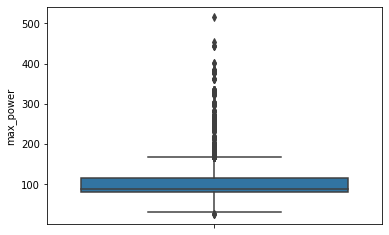

In [85]:
sns.boxplot(data=df_processed,y="max_power")
plt.show()

In [86]:
max_price_location = df_processed['resale_price'].idxmax()
print("Location of max price:")
print(df_processed.loc[max_price_location])

Location of max price:
full_name            2021 Mercedes-Benz G G 350d
resale_price                          36000000.0
registered_year              2021-01-01 00:00:00
engine_capacity                            2925 
insurance                          Comprehensive
transmission_type                      Automatic
kms_driven                               36000.0
owner_type                           First Owner
fuel_type                                 Diesel
max_power                                 281.61
seats                                        5.0
mileage                                     8.13
body_type                                    SUV
city                                       Delhi
car_age                                      2.0
Name: 1426, dtype: object


In [87]:
print(car_df.isna().sum())

full_name               0
resale_price            0
registered_year        67
engine_capacity        12
insurance               7
transmission_type       0
kms_driven              3
owner_type             45
fuel_type               0
max_power            3882
seats                  10
mileage              2484
body_type               0
city                    0
dtype: int64


C:\Users\Ankit Rai\AppData\Local\Temp\ipykernel_12172\1318417941.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df.registered_year)


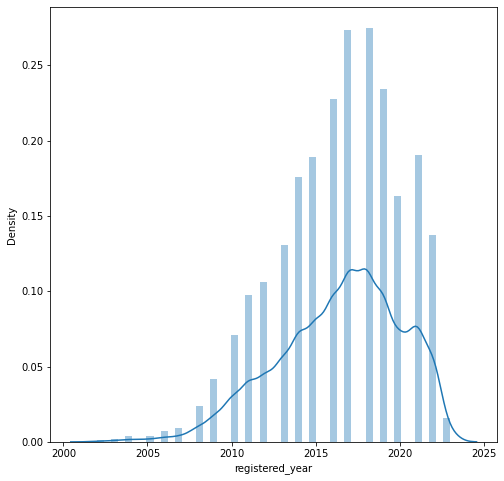

In [88]:
#Analysis using sns
fig,ax= plt.subplots(figsize=(8,8))
sns.distplot(car_df.registered_year)
plt.show()

Here the graph is skeweed so using median or mode as mean is not suitable


In [92]:
print(car_df.isnull().sum())
car_df.dtypes

full_name               0
resale_price            0
registered_year        67
engine_capacity        12
insurance               7
transmission_type       0
kms_driven              3
owner_type             45
fuel_type               0
max_power            3882
seats                  10
mileage              2484
body_type               0
city                    0
dtype: int64


full_name              object
resale_price          float64
registered_year        object
engine_capacity        object
insurance              object
transmission_type    category
kms_driven            float64
owner_type           category
fuel_type            category
max_power             float64
seats                 float64
mileage               float64
body_type              object
city                   object
dtype: object

C:\Users\Ankit Rai\AppData\Local\Temp\ipykernel_12172\3435446103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df.mileage)


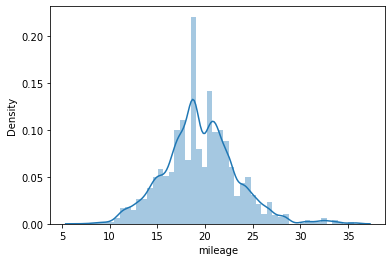

In [93]:
sns.distplot(car_df.mileage)
plt.show()

In [94]:
car_df['mileage'].fillna(car_df['mileage'].median(),inplace=True)
car_df.isnull().sum()

full_name               0
resale_price            0
registered_year        67
engine_capacity        12
insurance               7
transmission_type       0
kms_driven              3
owner_type             45
fuel_type               0
max_power            3882
seats                  10
mileage                 0
body_type               0
city                    0
dtype: int64

In [95]:
print(car_df['mileage'])

0        21.40
1        17.60
4        19.81
5        17.19
6        27.28
         ...  
17441    19.10
17442    19.16
17443    14.28
17444    17.01
17445    19.30
Name: mileage, Length: 17026, dtype: float64


C:\Users\Ankit Rai\AppData\Local\Temp\ipykernel_12172\4264400631.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df.max_power)


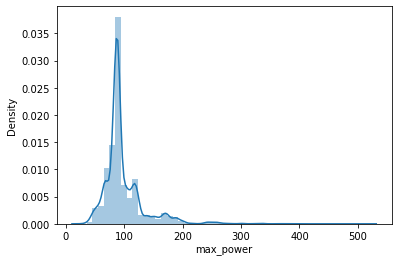

In [99]:
sns.distplot(car_df.max_power)
plt.show()

In [98]:
car_df['max_power'].fillna(car_df['max_power'].median(),inplace=True)
car_df.isnull().sum()

full_name             0
resale_price          0
registered_year      67
engine_capacity      12
insurance             7
transmission_type     0
kms_driven            3
owner_type           45
fuel_type             0
max_power             0
seats                10
mileage               0
body_type             0
city                  0
dtype: int64

In [100]:
car_df.to_csv('recar.csv')

In [102]:
new_car_df = pd.read_csv('recar.csv')
new_car_df.isnull().sum()

Unnamed: 0            0
full_name             0
resale_price          0
registered_year      67
engine_capacity      12
insurance             7
transmission_type     0
kms_driven            3
owner_type           45
fuel_type             0
max_power             0
seats                10
mileage               0
body_type             0
city                  0
dtype: int64

In [104]:
new_car_df = new_car_df.dropna(how='any')
new_car_df.isnull().sum()

Unnamed: 0           0
full_name            0
resale_price         0
registered_year      0
engine_capacity      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
max_power            0
seats                0
mileage              0
body_type            0
city                 0
dtype: int64

In [105]:
new_car_df.to_csv('recar.csv')